Code for examining how HMM performs under repeated recalibration


In [140]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import sys, glob
[sys.path.append(f) for f in glob.glob('../utils/*')]
from plotting_utils import figSize
from hmm import HMMRecalibration
import hmm_utils
from RTI_utils import RTI
import simulation_utils 
from simulation import simulateBCIFitts

# for a reproducible result
np.random.seed(1)

fig_path = '/home/users/ghwilson/projects/nonstationarities/figures/'
data_dir = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/simulator/efficiency/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
labels = ['supervised', 'HMM', 'Click HMM', 'RTI']

dicts = list()

for file in glob.glob(data_dir + '/*'):
    file_dict = np.load(file, allow_pickle = True)[0]
    
    for i, label in enumerate(labels):
        d = dict()
        d['ttt']       = file_dict['scores'][-1, i] 
        d['method']    = label
        d['nSimSteps'] = file_dict['nSimSteps']

        dicts.append(d)
        
df = pd.DataFrame(dicts)

## Vanilla HMM vs RTI comparisons

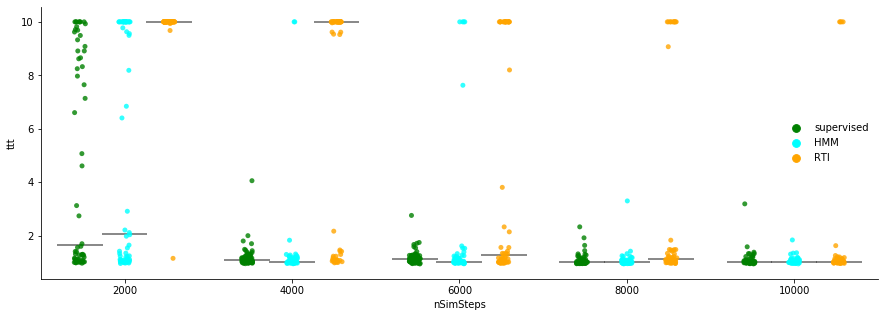

In [142]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'RTI']
colors = ['g', 'cyan', 'orange']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[3:],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/HMM_vs_RTI_efficiency', format = 'pdf')
plt.show()

In [145]:
import scipy.stats

for nSteps in [2000, 4000, 6000, 8000, 10000]:
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  RanksumsResult(statistic=0.9709981800007343, pvalue=0.331549184886875)
RTI vs supervised: p =  RanksumsResult(statistic=8.085528088060169, pvalue=6.189541094709007e-16)
RTI vs HMM: p =  RanksumsResult(statistic=6.0254373548153675, pvalue=1.6865293403793106e-09)
 
 Time (sec):  80.0
HMM vs supervised: p =  RanksumsResult(statistic=-1.9026315689203577, pvalue=0.05708863687369076)
RTI vs supervised: p =  RanksumsResult(statistic=6.308863850599366, pvalue=2.8109124901114145e-10)
RTI vs HMM: p =  RanksumsResult(statistic=6.886214119788991, pvalue=5.72967310093566e-12)
 
 Time (sec):  120.0
HMM vs supervised: p =  RanksumsResult(statistic=-1.85014518081221, pvalue=0.06429262752712192)
RTI vs supervised: p =  RanksumsResult(statistic=2.577081656110057, pvalue=0.009963840970127447)
RTI vs HMM: p =  RanksumsResult(statistic=3.5559527943270135, pvalue=0.0003766117019986892)
 
 Time (sec):  160.0
HMM vs supervised: p =  RanksumsResult(statistic=-0.5301

## Click HMM vs HMM comparisons

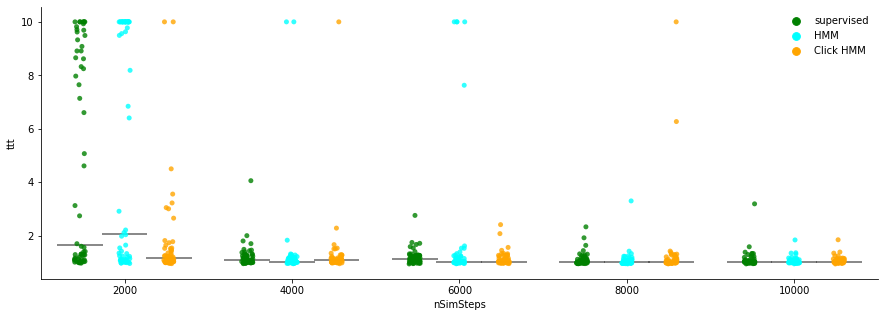

In [146]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'Click HMM']
colors = ['g', 'cyan', 'orange']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[3:],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/vanillaHMM_vs_clickHMM_efficiency', format = 'pdf')
plt.show()

In [147]:
import scipy.stats

for nSteps in [2000, 4000, 6000, 8000, 10000]:
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  RanksumsResult(statistic=0.9709981800007343, pvalue=0.331549184886875)
Click HMM vs supervised: p =  RanksumsResult(statistic=-3.6635498899487167, pvalue=0.00024874373996848666)
Click HMM vs HMM: p =  RanksumsResult(statistic=-3.815760415462345, pvalue=0.00013576418687329984)
 
 Time (sec):  80.0
HMM vs supervised: p =  RanksumsResult(statistic=-1.9026315689203577, pvalue=0.05708863687369076)
Click HMM vs supervised: p =  RanksumsResult(statistic=-0.13646460908118427, pvalue=0.8914540006397935)
Click HMM vs HMM: p =  RanksumsResult(statistic=1.9157531659473948, pvalue=0.055396521620748804)
 
 Time (sec):  120.0
HMM vs supervised: p =  RanksumsResult(statistic=-1.85014518081221, pvalue=0.06429262752712192)
Click HMM vs supervised: p =  RanksumsResult(statistic=-1.931499082379839, pvalue=0.05342136268763232)
Click HMM vs HMM: p =  RanksumsResult(statistic=0.12071869264873994, pvalue=0.9039138526840397)
 
 Time (sec):  160.0
HMM vs supervised: 